## Importing required Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import math,copy
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Reading and analyzing data

In [2]:
df=pd.read_csv("Ratings.tsv",sep='\t') # reading data file

In [3]:
df # Printing data frame

,restaurant,food,ambience,service,rating
0,1,85,82,89,78
1,2,80,90,80,85
2,3,83,86,83,85
3,4,70,96,75,72
4,5,68,80,78,75
5,6,65,70,56,54
6,7,64,68,61,62
7,8,72,95,72,73
8,9,69,70,78,70
9,10,75,80,75,77


In [4]:
df.info() # returns basic information of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   restaurant  15 non-null     int64
 1   food        15 non-null     int64
 2   ambience    15 non-null     int64
 3   service     15 non-null     int64
 4   rating      15 non-null     int64
dtypes: int64(5)
memory usage: 728.0 bytes


In [5]:
df.set_index('restaurant') # Setting restaurent column as index

,food,ambience,service,rating
restaurant,,,,
1,85,82,89,78
2,80,90,80,85
3,83,86,83,85
4,70,96,75,72
5,68,80,78,75
6,65,70,56,54
7,64,68,61,62
8,72,95,72,73
9,69,70,78,70


In [6]:
df.describe() # returns statistical parameters of the data

,restaurant,food,ambience,service,rating
count,15.000000,15.000000,15.000000,15.000000,15.000000
mean,8.000000,73.133333,81.733333,75.133333,73.066667
std,4.472136,6.555986,9.786774,8.069932,8.319226
min,1.000000,64.000000,68.000000,56.000000,54.000000
25%,4.500000,68.500000,71.000000,73.500000,70.500000
50%,8.000000,72.000000,82.000000,78.000000,74.000000
75%,11.500000,77.500000,90.000000,78.000000,77.500000
max,15.000000,85.000000,96.000000,89.000000,85.000000


In [7]:
df.isnull().sum() # Checking for null values

restaurant    0
food          0
ambience      0
service       0
rating        0
dtype: int64

In [8]:
df.corr() # returns the correlation between features

,restaurant,food,ambience,service,rating
restaurant,1.000000,-0.331328,-0.110975,-0.193960,-0.268783
food,-0.331328,1.000000,0.182054,0.739492,0.839303
ambience,-0.110975,0.182054,1.000000,0.348678,0.372210
service,-0.193960,0.739492,0.348678,1.000000,0.796753
rating,-0.268783,0.839303,0.372210,0.796753,1.000000


### Seperating features and target variable and scaling them

In [9]:
features = df[['food', 'ambience', 'service']].to_numpy() # Selecting input features and onverting data frame to numpy arrays for faster calculation
sc = StandardScaler() # Intializing scaler
X_fit = sc.fit_transform(features)  # Transforming Features
X = np.c_[np.ones((len(X_fit),1)), X_fit] # Adding extra feature and filling with ones so that we can use it for intercept 
y = df['rating'] # choosing target variable
y.to_numpy()# Converting data frame to numpy arrays for faster calculation
y = y.values.reshape((15,1)) # Making Y size compatible for calculations
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

### Intializing parameters for gradient descent

In [10]:
from numpy.random import randn
iterations=100
mean = 0; # Conisdering normal distribution with mean zero
std = 1; # Conisdering normal distribution with standard deviation one
theta = np.random.normal(mean,std,size=(X.shape[1], 1)) # intializing parameter values with mentioned condition for normal distribution
print("Intialized Parameter for food",theta[0])
print("Intialized Parameter for ambience",theta[1])
print("Intialized Parameter for service",theta[2])
print("Intialized Parameter for Intercept",theta[3])

Intialized Parameter for food [-0.87343385]
Intialized Parameter for ambience [1.21825754]
Intialized Parameter for service [-0.27874727]
Intialized Parameter for Intercept [2.64272885]


 ## Gradient Descent

In [11]:
def cost(theta, X, y):
    m = len(y)
    y_pred = X.dot(theta)
    residual = (1/(2*m))*np.sum(np.square(y_pred - y))
    return residual

def gradient_descent(X, y, theta, iterations):
    num_of_features = len(y)
    cost_list = np.zeros(iterations)
    theta_list = np.zeros((iterations, 4))
    
    for i in range(iterations):
        l_rate = 1/(i+1)  # Robbins Munro Algorithm
        y_predict = np.dot(X, theta)
        theta = theta - (1/num_of_features)*l_rate*(X.T.dot((y_predict - y)))
        theta_list[i,:] = theta.T
        cost_list[i] = cost(theta, X, y)
    return theta, cost_list, theta_list

#### Finding four parameters of Gradient Descent

In [12]:
optmized_theta, cost_list, theta_list  = gradient_descent(X_train, y_train, theta, iterations)
print("Parameter for food",optmized_theta[0])
print("Parameter for ambience",optmized_theta[1])
print("Parameter for service",optmized_theta[2])
print("Parameter for Intercept",optmized_theta[3])

Parameter for food [72.62863968]
Parameter for ambience [3.29668669]
Parameter for service [0.36927725]
Parameter for Intercept [4.21687581]


#### Plots of Performance vs Iterations

Text(0.5, 1.0, 'Service vs. iterations')

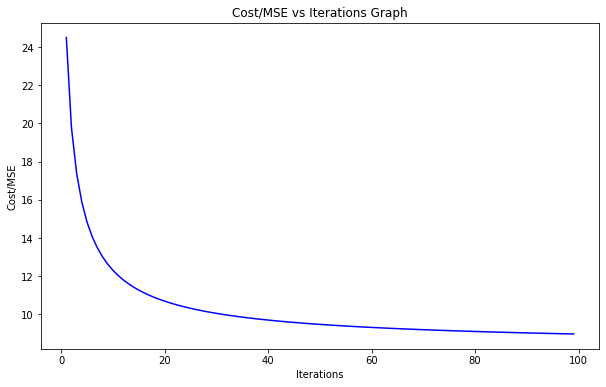

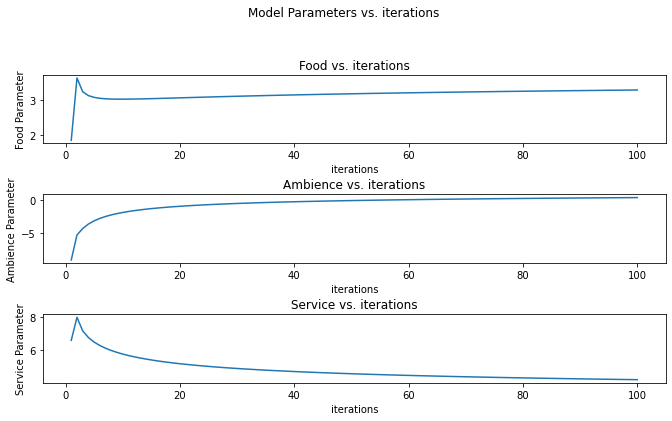

In [13]:
#Plot 1: Cost/MSE vs Iterations 
plt.rcParams["figure.figsize"] = (10,6)
plt.plot(np.arange(1,iterations), cost_list[1:], color = 'blue')
plt.title('Cost/MSE vs Iterations Graph')
plt.xlabel('Iterations')
plt.ylabel('Cost/MSE')
    

#Plot 2: Parameters vs Iterations
fig, axs = plt.subplots(3, figsize = (10,6))
fig.suptitle('Model Parameters vs. iterations')
fig.tight_layout(pad=3)
    
axs[0].plot(np.arange(1,iterations+1), theta_list[:,1])
axs[0].set_xlabel('iterations')
axs[0].set_ylabel('Food Parameter')    
axs[0].set_title('Food vs. iterations')
    
axs[1].plot(np.arange(1,iterations+1), theta_list[:,2])
axs[1].set_xlabel('iterations')
axs[1].set_ylabel('Ambience Parameter')
axs[1].set_title('Ambience vs. iterations')
    
axs[2].plot(np.arange(1,iterations+1), theta_list[:,3])
axs[2].set_xlabel('iterations')
axs[2].set_ylabel('Service Parameter')
axs[2].set_title('Service vs. iterations')

## Stochastic Gradient Descent

In [14]:
def stochastic_gradient_descent(X, y, theta, iterations):
    num_of_features = len(y)
    cost_list = np.zeros(iterations)
    theta_list = np.zeros((iterations, 4))
    
    for i in range(iterations):
        residual = 0.0
        l_rate = 1/(i+1)
        for j in range(num_of_features):
            rand_ind = np.random.randint(num_of_features)
            X_i = X[rand_ind, :].reshape(1, X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            y_predict = np.dot(X_i, theta)
            
            theta = theta - (1/num_of_features)*l_rate*(X_i.T.dot((y_predict - y_i)))
            residual += cost(theta, X_i, y_i)
        
        cost_list[i] = residual
        theta_list[i,:] = theta.T
    return theta, cost_list, theta_list

#### Finding four parameters of Stochastic Gradient Descent

In [15]:
theta_sgd,cost_sgd, theta_sgd_list  = stochastic_gradient_descent(X_train, y_train, theta,iterations )
print("SGD: Parameter for food",theta_sgd[0])
print("SGD: Parameter for ambience",theta_sgd[1])
print("SGD: Parameter for service",theta_sgd[2])
print("SGD: Parameter for Intercept",theta_sgd[3])

SGD: Parameter for food [72.02246267]
SGD: Parameter for ambience [3.73218026]
SGD: Parameter for service [-0.43878306]
SGD: Parameter for Intercept [4.10207503]


### Plots of Performance vs Iteration

Text(0.5, 1.0, 'Service vs. iterations')

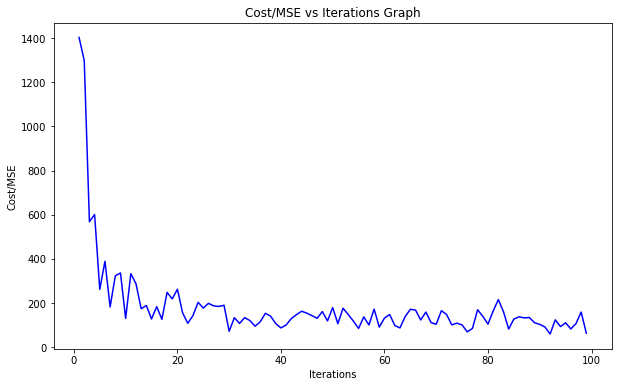

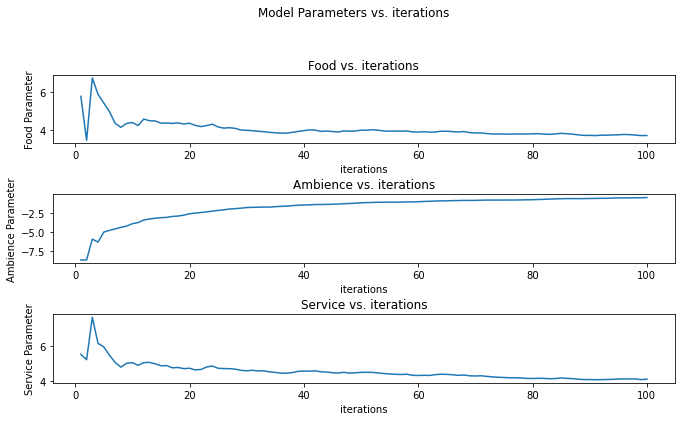

In [16]:
#Plot 1: Cost/MSE vs Iterations 
plt.rcParams["figure.figsize"] = (10,6)
plt.plot(np.arange(1,iterations), cost_sgd[1:], color = 'blue')
plt.title('Cost/MSE vs Iterations Graph')
plt.xlabel('Iterations')
plt.ylabel('Cost/MSE')
    

#Plot 2: Parameters vs Iterations
fig, axs = plt.subplots(3, figsize = (10,6))
fig.suptitle('Model Parameters vs. iterations')
fig.tight_layout(pad=3)
    
axs[0].plot(np.arange(1,iterations+1), theta_sgd_list[:,1])
axs[0].set_xlabel('iterations')
axs[0].set_ylabel('Food Parameter')    
axs[0].set_title('Food vs. iterations')
    
axs[1].plot(np.arange(1,iterations+1), theta_sgd_list[:,2])
axs[1].set_xlabel('iterations')
axs[1].set_ylabel('Ambience Parameter')
axs[1].set_title('Ambience vs. iterations')
    
axs[2].plot(np.arange(1,iterations+1), theta_sgd_list[:,3])
axs[2].set_xlabel('iterations')
axs[2].set_ylabel('Service Parameter')
axs[2].set_title('Service vs. iterations')

Changing iterations to 1000 times and running the stochastic model.

In [17]:
iterations = 1000 # Running the code for 1000 times
theta_random,cost_random, theta_random_list  = stochastic_gradient_descent(X_train, y_train, theta,iterations)
print("SGD: Parameter for food",theta_random[0])
print("SGD: Parameter for ambience",theta_random[1])
print("SGD: Parameter for service",theta_random[2])
print("SGD: Parameter for Intercept",theta_random[3])

SGD: Parameter for food [72.92234793]
SGD: Parameter for ambience [3.76382493]
SGD: Parameter for service [1.22201704]
SGD: Parameter for Intercept [3.35665814]


### Plots : Performance vs Iterations

Text(0.5, 1.0, 'Service vs. iterations')

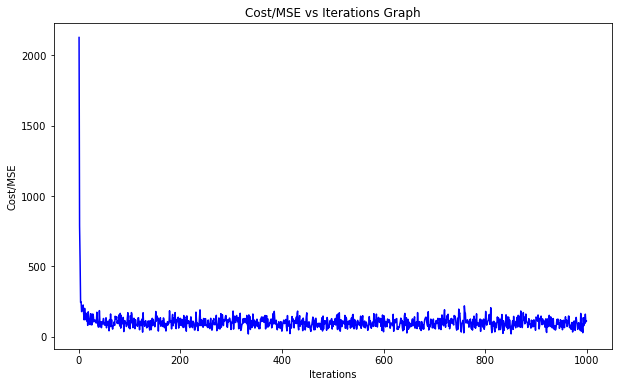

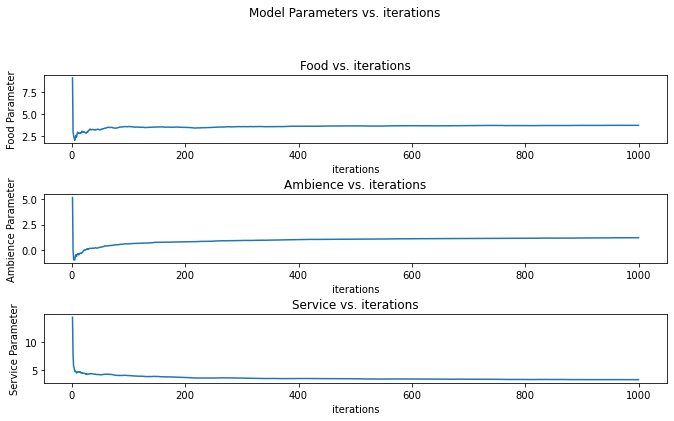

In [18]:
#Plot 1: Cost/MSE vs Iterations 
plt.rcParams["figure.figsize"] = (10,6)
plt.plot(np.arange(1,iterations), cost_random[1:], color = 'blue')
plt.title('Cost/MSE vs Iterations Graph')
plt.xlabel('Iterations')
plt.ylabel('Cost/MSE')
    
#Plot 2: Parameters vs Iterations
fig, axs = plt.subplots(3, figsize = (10,6))
fig.suptitle('Model Parameters vs. iterations')
fig.tight_layout(pad=3)
    
axs[0].plot(np.arange(1,iterations+1), theta_random_list[:,1])
axs[0].set_xlabel('iterations')
axs[0].set_ylabel('Food Parameter')    
axs[0].set_title('Food vs. iterations')
    
axs[1].plot(np.arange(1,iterations+1), theta_random_list[:,2])
axs[1].set_xlabel('iterations')
axs[1].set_ylabel('Ambience Parameter')
axs[1].set_title('Ambience vs. iterations')
    
axs[2].plot(np.arange(1,iterations+1), theta_random_list[:,3])
axs[2].set_xlabel('iterations')
axs[2].set_ylabel('Service Parameter')
axs[2].set_title('Service vs. iterations')

### Means of 4 Parameters

In [19]:
theta_Food = theta_random_list[:,0]
theta_Ambience = theta_random_list[:,1]
theta_Service = theta_random_list[:,2]
theta_intercept = theta_random_list[:,3]

theta_Food_mean = np.mean(theta_Food)
print("Mean for paramter of food variable is:",theta_Food_mean)
theta_Ambience_mean = np.mean(theta_Ambience)
print("Mean for paramter of Ambience variable is:",theta_Ambience_mean)
theta_Service_mean = np.mean(theta_Service)
print("Mean for paramter of service variable is:",theta_Service_mean)
theta_intercept_mean = np.mean(theta_intercept)
print("Mean for paramter of intercept is:",theta_intercept_mean)

Mean for paramter of food variable is: 72.68101331096693
Mean for paramter of Ambience variable is: 3.6391290664918596
Mean for paramter of service variable is: 0.9754844331584486
Mean for paramter of intercept is: 3.623980088127825


### Parameter values using statsmodels module

In [20]:
import statsmodels.api as sm # Importing statsmodels module
model = sm.OLS(y_train, sm.add_constant(X_train)).fit()
model_params = model.params
model_params

array([73.03813963,  4.2810691 ,  1.67667932,  2.57638014])